In [13]:
import pandas as pd

from datetime import datetime

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [14]:
df = pd.read_csv('creations.csv')
df.created_at = pd.to_datetime(df.created_at)  

In [15]:
df_android_kotlin = df[(df.scope == 'android') & (df.language == 'kotlin')]
df_android_java = df[(df.scope == 'android') & (df.language == 'java')]
df_all_kotlin = df[(df.scope == 'NOT android') & (df.language == 'kotlin')]
df_all_java = df[(df.scope == 'NOT android') & (df.language == 'java')]

### Counts and pcts

In [16]:
android_kotlin_count = df_android_kotlin['count'].sum()
android_java_count = df_android_java['count'].sum()
all_kotlin_count = df_all_kotlin['count'].sum()
all_java_count = df_all_java['count'].sum()

start_date = df.created_at.min().strftime('%Y-%m-%d')
end_date = '2019-01-15'

print(f'Repositories created on Github from {start_date} to {end_date}')

android_kotlin_pct = round(android_kotlin_count / (android_kotlin_count + android_java_count) * 100, 2)
print(f'android + kotlin -> count: {android_kotlin_count}, pct: {android_kotlin_pct}% ')

android_java_pct = round(android_java_count / (android_kotlin_count + android_java_count) * 100, 2)
print(f'android + java -> count: {android_java_count}, pct: {android_java_pct}% ')

all_kotlin_pct = round(all_kotlin_count / (all_kotlin_count + all_java_count) * 100, 2)
print(f'not android + kotlin -> count: {all_kotlin_count}, pct: {all_kotlin_pct}% ')

all_java_pct = round(all_java_count / (all_kotlin_count + all_java_count) * 100, 2)
print(f'not android + java -> count: {all_java_count}, pct: {all_java_pct}% ')

Repositories created on Github from 2016-02-15 to 2019-01-15
android + kotlin -> count: 25399, pct: 6.91% 
android + java -> count: 342231, pct: 93.09% 
not android + kotlin -> count: 91808, pct: 2.29% 
not android + java -> count: 3910472, pct: 97.71% 


In [17]:
def setup_plot(x_label, y_label):
    figure(num=None, figsize=(13, 5))
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    google_official_support_date = datetime.strptime('2017-05-17', '%Y-%m-%d')
    plt.axvline(google_official_support_date, color='grey', linewidth=1)

### Monthly Android Kotlin repositories created from 2016-02-15 to 2019-01-15

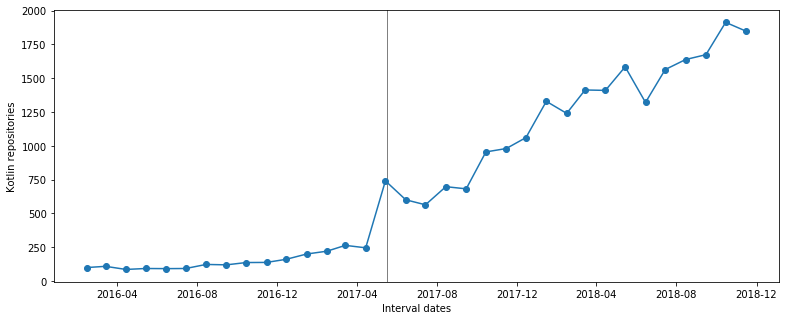

In [18]:
setup_plot('Interval dates', 'Kotlin repositories')
plt.plot_date(df_android_kotlin.created_at, df_android_kotlin['count'], linestyle='solid');

### Trend in %: Android-Kotlin/Android-Java vs Kotlin/Java

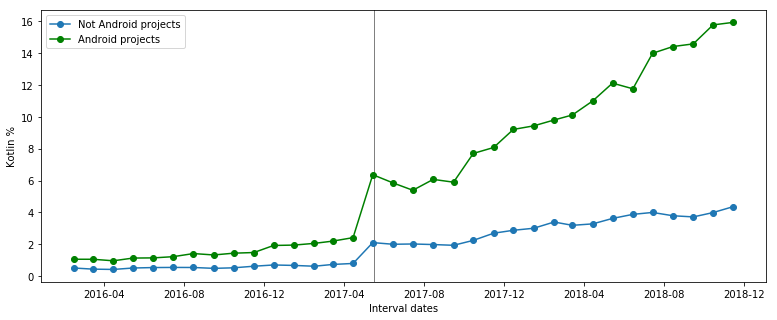

In [19]:
setup_plot('Interval dates', 'Kotlin %')

chage_pct_all = 100 * (df_all_kotlin['count'].values / (df_all_kotlin['count'].values + df_all_java['count'].values))
plt.plot_date(df_all_kotlin.created_at, chage_pct_all, linestyle='solid', label='Not Android projects')

chage_pct_android = 100 * (df_android_kotlin['count'].values / (df_android_kotlin['count'].values + df_android_java['count'].values))
plt.plot_date(df_android_java.created_at, chage_pct_android, linestyle='solid', label='Android projects', color='g');

plt.legend()

plt.show()

In [20]:
print(f'Kotlin Android latest month: {round(chage_pct_android[-1], 2)}%')
print(f'Kotlin Not Android latest month: {round(chage_pct_all[-1], 2)}%')

Kotlin Android latest month: 15.93%
Kotlin Not Android latest month: 4.36%
